Notebook 2: Regression analysis to assess relationship between green/low-carbon power generation capacity and HDI

In [1]:
#Import dependencies and create file paths

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

csv_path = "Resources/global_power_plant_database.csv"
global_pwrplant = pd.read_csv(csv_path)
csv_path1 = "Resources/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4701247.csv"
gdp_data = pd.read_csv(csv_path1,skiprows=4)
csv_path2 = "Resources/Human Development Index - Full.csv"
hdi_data = pd.read_csv(csv_path2)
csv_path3 = "Resources/country_codes.csv"
country_regions = pd.read_csv(csv_path3, encoding="ISO-8859-1")
csv_path4 = "Resources/green_energy_grp.csv"
green_energy_data = pd.read_csv(csv_path4)
csv_path5 = "Resources/country_total_capacity.csv"
total_capacity_data = pd.read_csv(csv_path5)


/var/folders/ng/41b1kp4n0wg3hvfwdd1fdzzm0000gn/T/ipykernel_58861/880434.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  global_pwrplant = pd.read_csv(csv_path)


In [2]:
#Clean country_regions dataframe
country_regions
country_regions.rename(columns={'country':'Country Code', 'region':'Region', 'sub-region': 'Sub-Region'}, inplace=True)
country_regions_cleaned=country_regions[['Country Code', 'Region', 'Sub-Region']]
country_regions_cleaned


,Country Code,Region,Sub-Region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia
...,...,...,...
244,WLF,Oceania,Polynesia
245,ESH,Africa,Northern Africa
246,YEM,Asia,Western Asia
247,ZMB,Africa,Sub-Saharan Africa


In [3]:
#Merge dataframes containing GDP and HDI data

gdp_hdi_data = pd.merge(gdp_data,hdi_data, left_on = "Country Code", right_on = "ISO3", how = "inner")
gdp_hdi_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,WSM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.66,3.60,3.55,3.39,3.48,3.06,2.84,2.89,2.89,2.89
192,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,9.55,10.09,8.41,8.06,7.55,7.76,7.60,7.55,7.55,7.55
193,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,4.74,4.68,3.92,3.36,3.12,3.21,2.80,2.38,2.38,2.38


In [4]:
#Clean merged dataframe containing GDP and HDI data and rename columns
hdi_gdp_reduced = gdp_hdi_data[["Country Name","Country Code", "Human Development Index (2021)","2021"]]
hdi_gdp_reduced.rename(columns={'2021': 'GDP (2021)'}, inplace=True)

hdi_gdp_reduced

/var/folders/ng/41b1kp4n0wg3hvfwdd1fdzzm0000gn/T/ipykernel_58861/590187717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_gdp_reduced.rename(columns={'2021': 'GDP (2021)'}, inplace=True)


,Country Name,Country Code,Human Development Index (2021),GDP (2021)
0,Afghanistan,AFG,0.478,NaN
1,Angola,AGO,0.586,7.254699e+10
2,Albania,ALB,0.796,1.826004e+10
3,Andorra,AND,0.858,3.329911e+09
4,United Arab Emirates,ARE,0.911,NaN
...,...,...,...,...
190,Samoa,WSM,0.707,7.883900e+08
191,"Yemen, Rep.",YEM,0.455,2.106169e+10
192,South Africa,ZAF,0.713,4.199464e+11
193,Zambia,ZMB,0.565,2.120306e+10


In [5]:
#Rename columns in dataframe containing total installed power generation capacity for each country
total_capacity_data
total_capacity_data.rename(columns={'country_long':'Country Name', 
                                    'total_fuel_types': 'Total Installed Capacity (All Fuel Types)',}, inplace=True)
total_capacity_data

,Unnamed: 0,Country Name,Total Installed Capacity (All Fuel Types),Country Code
0,0,Afghanistan,300.550,AFG
1,1,Albania,1529.000,ALB
2,2,Algeria,15873.800,DZA
3,3,Angola,1071.180,AGO
4,4,Antarctica,7.600,ATA
...,...,...,...,...
162,162,Vietnam,41350.490,VNM
163,163,Western Sahara,23.400,ESH
164,164,Yemen,1045.000,YEM
165,165,Zambia,2689.337,ZMB


In [6]:
#Merge total installed capacity dataframe with dataframe containing HDI and GDP per capita data

merge_totalcap_gdp_hdi = pd.merge(hdi_gdp_reduced, total_capacity_data, on='Country Code', how='inner')
merge_totalcap_gdp_hdi

# #Delete unneeded colums
del merge_totalcap_gdp_hdi['Country Name_y']
merge_totalcap_gdp_hdi

del merge_totalcap_gdp_hdi['Unnamed: 0']
merge_totalcap_gdp_hdi



,Country Name_x,Country Code,Human Development Index (2021),GDP (2021),Total Installed Capacity (All Fuel Types)
0,Afghanistan,AFG,0.478,NaN,300.550
1,Angola,AGO,0.586,7.254699e+10,1071.180
2,Albania,ALB,0.796,1.826004e+10,1529.000
3,United Arab Emirates,ARE,0.911,NaN,30327.000
4,Argentina,ARG,0.842,4.914927e+11,32913.079
...,...,...,...,...,...
157,Vietnam,VNM,0.703,3.626375e+11,41350.490
158,"Yemen, Rep.",YEM,0.455,2.106169e+10,1045.000
159,South Africa,ZAF,0.713,4.199464e+11,50422.700
160,Zambia,ZMB,0.565,2.120306e+10,2689.337


In [7]:
#Merge with dataframe containing total installed green/low-carbon power generation capacity
green_energy_data
#Rename Columns
green_energy_data.rename(columns={'country_long':'Country Name', 'total_green_power': 'Total Installed Capacity (Low-Carbon Fuel Types)', 'country': 'Country Code'}, inplace=True)
green_energy_data

#Execute merge
full_merge_df = pd.merge(merge_totalcap_gdp_hdi, green_energy_data, on='Country Code', how='inner')

full_merge_df


,Country Name_x,Country Code,Human Development Index (2021),GDP (2021),Total Installed Capacity (All Fuel Types),Unnamed: 0,Country Name,Total Installed Capacity (Low-Carbon Fuel Types)
0,Afghanistan,AFG,0.478,NaN,300.550,0,Afghanistan,258.550
1,Angola,AGO,0.586,7.254699e+10,1071.180,3,Angola,770.600
2,Albania,ALB,0.796,1.826004e+10,1529.000,1,Albania,1431.000
3,United Arab Emirates,ARE,0.911,NaN,30327.000,141,United Arab Emirates,840.000
4,Argentina,ARG,0.842,4.914927e+11,32913.079,5,Argentina,12490.090
...,...,...,...,...,...,...,...,...
142,"Venezuela, RB",VEN,0.691,NaN,31096.000,146,Venezuela,17666.000
143,Vietnam,VNM,0.703,3.626375e+11,41350.490,147,Vietnam,18576.490
144,South Africa,ZAF,0.713,4.199464e+11,50422.700,122,South Africa,8177.110
145,Zambia,ZMB,0.565,2.120306e+10,2689.337,148,Zambia,2219.737


In [8]:
#Drop unneeded columns and clean dataframe

cleaned_df = full_merge_df[['Country Name_x', 'Country Code', 'Human Development Index (2021)', 'GDP (2021)', 'Total Installed Capacity (All Fuel Types)', 'Total Installed Capacity (Low-Carbon Fuel Types)']]
cleaned_df.rename(columns={'Country_Name_x': 'Country name'}, inplace=True)
cleaned_df

/var/folders/ng/41b1kp4n0wg3hvfwdd1fdzzm0000gn/T/ipykernel_58861/1944304257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.rename(columns={'Country_Name_x': 'Country name'}, inplace=True)


,Country Name_x,Country Code,Human Development Index (2021),GDP (2021),Total Installed Capacity (All Fuel Types),Total Installed Capacity (Low-Carbon Fuel Types)
0,Afghanistan,AFG,0.478,NaN,300.550,258.550
1,Angola,AGO,0.586,7.254699e+10,1071.180,770.600
2,Albania,ALB,0.796,1.826004e+10,1529.000,1431.000
3,United Arab Emirates,ARE,0.911,NaN,30327.000,840.000
4,Argentina,ARG,0.842,4.914927e+11,32913.079,12490.090
...,...,...,...,...,...,...
142,"Venezuela, RB",VEN,0.691,NaN,31096.000,17666.000
143,Vietnam,VNM,0.703,3.626375e+11,41350.490,18576.490
144,South Africa,ZAF,0.713,4.199464e+11,50422.700,8177.110
145,Zambia,ZMB,0.565,2.120306e+10,2689.337,2219.737


In [9]:
#Add new column and populate with % of installed capacity for low-carbon fuel types

cleaned_df['Low-Carbon Power Generation Capacity (% of Total)'] = ''
cleaned_df
cleaned_df['Low-Carbon Power Generation Capacity (% of Total)'] = (cleaned_df['Total Installed Capacity (Low-Carbon Fuel Types)'] / cleaned_df['Total Installed Capacity (All Fuel Types)'])*100
cleaned_df.sort_values('Low-Carbon Power Generation Capacity (% of Total)', ascending=False)


/var/folders/ng/41b1kp4n0wg3hvfwdd1fdzzm0000gn/T/ipykernel_58861/2075313715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Low-Carbon Power Generation Capacity (% of Total)'] = ''
/var/folders/ng/41b1kp4n0wg3hvfwdd1fdzzm0000gn/T/ipykernel_58861/2075313715.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Low-Carbon Power Generation Capacity (% of Total)'] = (cleaned_df['Total Installed Capacity (Low-Carbon Fuel Types)'] / cleaned_df['Total Installed Capacity (All Fuel Types)']

,Country Name_x,Country Code,Human Development Index (2021),GDP (2021),Total Installed Capacity (All Fuel Types),Total Installed Capacity (Low-Carbon Fuel Types),Low-Carbon Power Generation Capacity (% of Total)
19,Bhutan,BTN,0.666,NaN,1482.20,1482.20,100.000000
103,Nepal,NPL,0.602,3.628883e+10,587.95,587.95,100.000000
42,Ethiopia,ETH,0.498,1.112711e+11,4023.90,4023.90,100.000000
92,Mozambique,MOZ,0.446,1.609583e+10,2285.00,2285.00,100.000000
114,Paraguay,PRY,0.717,3.898681e+10,8760.00,8760.00,100.000000
...,...,...,...,...,...,...,...
84,Moldova,MDA,0.767,1.367922e+10,2914.00,64.00,2.196294
32,Cuba,CUB,0.764,NaN,3796.80,19.20,0.505689
119,Saudi Arabia,SAU,0.875,8.335412e+11,84341.55,137.00,0.162435
14,Bahrain,BHR,0.875,3.886866e+10,7586.30,5.00,0.065908


In [10]:
#Merge regions from dataframe containing each country's region

final_merge_df = pd.merge(cleaned_df, country_regions_cleaned, on='Country Code', how='inner')
final_merge_df

,Country Name_x,Country Code,Human Development Index (2021),GDP (2021),Total Installed Capacity (All Fuel Types),Total Installed Capacity (Low-Carbon Fuel Types),Low-Carbon Power Generation Capacity (% of Total),Region,Sub-Region
0,Afghanistan,AFG,0.478,NaN,300.550,258.550,86.025620,Asia,Southern Asia
1,Angola,AGO,0.586,7.254699e+10,1071.180,770.600,71.939357,Africa,Sub-Saharan Africa
2,Albania,ALB,0.796,1.826004e+10,1529.000,1431.000,93.590582,Europe,Southern Europe
3,United Arab Emirates,ARE,0.911,NaN,30327.000,840.000,2.769809,Asia,Western Asia
4,Argentina,ARG,0.842,4.914927e+11,32913.079,12490.090,37.948713,Americas,Latin America and the Caribbean
...,...,...,...,...,...,...,...,...,...
142,"Venezuela, RB",VEN,0.691,NaN,31096.000,17666.000,56.811165,Americas,Latin America and the Caribbean
143,Vietnam,VNM,0.703,3.626375e+11,41350.490,18576.490,44.924474,Asia,South-eastern Asia
144,South Africa,ZAF,0.713,4.199464e+11,50422.700,8177.110,16.217120,Africa,Sub-Saharan Africa
145,Zambia,ZMB,0.565,2.120306e+10,2689.337,2219.737,82.538447,Africa,Sub-Saharan Africa


In [11]:
#Drop countries with null values for independent variables prior to running regression

final_merge_df['GDP (2021)'].isna().sum()
final_merge_df_nonulls = final_merge_df.dropna(subset=['GDP (2021)'])
final_merge_df_nonulls

#Attempt to rename column titles
final_merge_df_nonulls.rename(columns={'Country_Name_x':'Country Name'}, inplace=True)
final_merge_df_nonulls.head()

/var/folders/ng/41b1kp4n0wg3hvfwdd1fdzzm0000gn/T/ipykernel_58861/329627583.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merge_df_nonulls.rename(columns={'Country_Name_x':'Country Name'}, inplace=True)


,Country Name_x,Country Code,Human Development Index (2021),GDP (2021),Total Installed Capacity (All Fuel Types),Total Installed Capacity (Low-Carbon Fuel Types),Low-Carbon Power Generation Capacity (% of Total),Region,Sub-Region
1,Angola,AGO,0.586,7.254699e+10,1071.180,770.60,71.939357,Africa,Sub-Saharan Africa
2,Albania,ALB,0.796,1.826004e+10,1529.000,1431.00,93.590582,Europe,Southern Europe
4,Argentina,ARG,0.842,4.914927e+11,32913.079,12490.09,37.948713,Americas,Latin America and the Caribbean
5,Armenia,ARM,0.759,1.386118e+10,3271.000,1340.00,40.966065,Asia,Western Asia
6,Australia,AUS,0.951,1.542660e+12,65852.016,19009.10,28.866390,Oceania,Australia and New Zealand


In [12]:
#Add dummy variable columns for sub-regions
final_reg_df = pd.get_dummies(data=final_merge_df_nonulls, columns = ['Sub-Region'])
final_reg_df

#Rename column titles

final_reg_df.rename(columns = {'Sub-Region_Australia and New Zealand': 'Australia and New Zealand', 
                               'Sub-Region_Central Asia': 'Central Asia', 
                               'Sub-Region_Melanesia': 'Melanesia', 
                               'Sub-Region_Northern Africa': 'Northern Africa', 
                               'Sub-Region_Northern America': 'North America',
                               'Sub-Region_Northern Europe': 'Northern Europe',
                               'Sub-Region_Eastern Asia': 'East Asia',
                               'Sub-Region_Eastern Europe': 'Eastern Europe',
                               'Sub-Region_Latin America and the Caribbean': 'Latin America and Caribbean',
                               'Sub-Region_Southern Asia': 'Southern Asia',
                               'Sub-Region_South-eastern Asia': 'Southeast Asia',
                               'Sub-Region_Southern Europe': 'Southern Europe',
                               'Sub-Region_Sub-Saharan Africa': 'Sub-Saharan Africa', 
                               'Sub-Region_Western Asia': 'Western Asia',
                               'Sub-Region_Western Europe': 'Western Europe'}, inplace=True)
final_reg_df.columns

Index(['Country Name_x', 'Country Code', 'Human Development Index (2021)',
       'GDP (2021)', 'Total Installed Capacity (All Fuel Types)',
       'Total Installed Capacity (Low-Carbon Fuel Types)',
       'Low-Carbon Power Generation Capacity (% of Total)', 'Region',
       'Australia and New Zealand', 'Central Asia', 'East Asia',
       'Eastern Europe', 'Latin America and Caribbean', 'Melanesia',
       'Northern Africa', 'North America', 'Northern Europe', 'Southeast Asia',
       'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa',
       'Western Asia', 'Western Europe'],
      dtype='object')

In [13]:
#Define independent and dependednt variables for regression to estimate effect of 'Total Installed Low-Carbon Capacity (%)' on HDI 
# *Note: Removed 'Melanesia' from independent variables to avoid collinearity with other region dummy variables

x = final_reg_df[['Low-Carbon Power Generation Capacity (% of Total)', 'GDP (2021)','Australia and New Zealand','Central Asia', 'East Asia',
       'Eastern Europe',
       'Northern Africa', 'North America', 'Northern Europe', 'Southeast Asia',
       'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa',
       'Western Asia', 'Latin America and Caribbean', 'Western Europe']]

y = final_reg_df[['Human Development Index (2021)']]


In [14]:
#Run multiple regression using StatsModels

#Add constant
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

#Print regression results
print_model = model.summary()
print(print_model)



                                  OLS Regression Results                                  
Dep. Variable:     Human Development Index (2021)   R-squared:                       0.806
Model:                                        OLS   Adj. R-squared:                  0.781
Method:                             Least Squares   F-statistic:                     31.50
Date:                            Wed, 30 Nov 2022   Prob (F-statistic):           1.51e-35
Time:                                    08:50:47   Log-Likelihood:                 178.20
No. Observations:                             138   AIC:                            -322.4
Df Residuals:                                 121   BIC:                            -272.6
Df Model:                                      16                                         
Covariance Type:                        nonrobust                                         
                                                        coef    std err          t      P>

Text(0, 0.25, 'Simplified regression equation:\n HDI = -0.0006 (Low-Carbon Power Generation Capacity (% of Total)) + 0.6819')

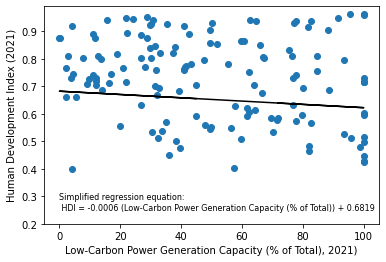

In [15]:
#Create scatter plot showing relationship of % Low-Carbon Power Generation Capacity

#Define x and y values
x_values = final_reg_df['Low-Carbon Power Generation Capacity (% of Total)']

y_values = final_reg_df['Human Development Index (2021)']

#Create scatter plot
final_reg_scatter = plt.scatter(x_values, y_values)
plt.xlabel('Low-Carbon Power Generation Capacity (% of Total), 2021)')
plt.ylabel('Human Development Index (2021)')
plt.ylim(0.2)


# annotate with vizualization and equation of regression line
reg_values = x_values * -.0006 + 0.6819
plt.plot(x_values, reg_values, 'black')

line_description = 'Simplified regression equation:\n HDI = -0.0006 (Low-Carbon Power Generation Capacity (% of Total)) + 0.6819'
plt.annotate(line_description, (0,0.25), fontsize=8,color="black")

Interpretation of regression equation: 

A 1 percentage point increase in the percentage of installed power generation capacity that comes from low-carbon sources is associated with a 0.0006-point reduction in HDI.